In [1]:
import torch

In [2]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [3]:
print("Size:", x.size())
print("Shape:", x.shape)
print("Rank:", x.ndimension())

Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
Rank: 2


In [4]:
# increase rank
x = torch.unsqueeze(x, 0)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("Rank:", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
Rank: 3


In [5]:
# reduce rank
x = torch.squeeze(x)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("Rank:", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
Rank: 2


In [6]:
x = x.view(9)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("Rank:", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
Rank: 1


In [7]:
try:
    x = x.view(2, 4)
except Exception as e:
    print(e)

shape '[2, 4]' is invalid for input of size 9


In [8]:
w = torch.randn(5, 3, dtype=torch.float)
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[ 0.9174, -0.8872,  1.4009],
        [ 1.0458, -0.0122,  0.6954],
        [-0.6098,  0.0868, -1.0878],
        [ 1.5969,  0.9144,  0.5928],
        [ 0.6183,  1.0645,  0.4135]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [9]:
b = torch.randn(5, 2, dtype=torch.float)
print("b size:", b.size())
print("b:", b)

b size: torch.Size([5, 2])
b: tensor([[ 0.6081,  1.1841],
        [ 2.2210,  0.0593],
        [-0.3972, -0.6384],
        [ 1.1867,  0.6604],
        [-0.5867,  0.1903]])


In [10]:
wx = torch.mm(w, x) # shape should be [5, 2]
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[ 5.2605,  6.6916],
        [ 4.4860,  6.2149],
        [-5.7885, -7.3994],
        [ 7.3042, 10.4083],
        [ 5.8793,  7.9756]])


In [11]:
result = wx + b 
print("result size:", result.size())
print("result:", result)

result size: torch.Size([5, 2])
result: tensor([[ 5.8686,  7.8757],
        [ 6.7070,  6.2742],
        [-6.1857, -8.0377],
        [ 8.4909, 11.0688],
        [ 5.2926,  8.1659]])


#### Autograd

In [12]:
w = torch.tensor(1.0, requires_grad=True)

In [13]:
a = w*3

In [14]:
l = a**2

l = a^2 = (3w)^2 = 9w^2

In [15]:
l.backward()
print("derivative of l {}".format(w.grad))

derivative of l 18.0


## 경사하강법으로 이미지 복원하기

이번 프로젝트에서 우리가 풀 문제는 다음과 같습니다.

이미지 처리를 위해 만들어 두었던 weird_function() 함수에 실수로 버그가 들어가 100×100 픽셀의 오염된 미미지가 만들어졌습니다. 이 오염된 이미지와 오염되기 전 원본 이미지를 동시에 파일로 저장하려고 했으나, 모종의 이유로 원본 이미지 파일은 삭제된 상황입니다. 다행히도 weird_function()의 소스코드는 남아 있습니다. 오염된 이미지와 weird_function()을 활용해 원본 이미지를 복원해봅시다.


In [16]:
import torch
import pickle
import matplotlib.pyplot as plt

In [17]:
shp_original_img = (100, 100)
broken_image =  torch.FloatTensor( pickle.load(open('../../penguin_pytorch/3-min-pytorch/03-파이토치로_구현하는_ANN/broken_image_t.p', 'rb'),encoding='latin1' ) )

In [18]:
broken_image.size()

torch.Size([10000])

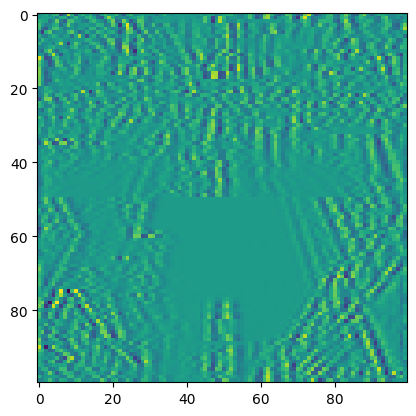

In [19]:
plt.imshow(broken_image.view(100, 100))

In [20]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [21]:
## Hypothesis 와 broken image 의 오차 계산 함수
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [22]:
random_tensor = torch.randn(10000, dtype=torch.float)

In [23]:
lr = 0.8

## 경사하강법 구현
for i in range(0, 20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print(f'Loss at {i} = {loss.item()}')

Loss at 0 = 12.451753616333008
Loss at 1000 = 1.1573976278305054
Loss at 2000 = 0.5503696799278259
Loss at 3000 = 0.37882643938064575
Loss at 4000 = 0.30002081394195557
Loss at 5000 = 0.25239571928977966
Loss at 6000 = 0.21825096011161804
Loss at 7000 = 0.19102713465690613
Loss at 8000 = 0.16785000264644623
Loss at 9000 = 0.14726382493972778
Loss at 10000 = 0.1284361034631729
Loss at 11000 = 0.11085153371095657
Loss at 12000 = 0.09417550265789032
Loss at 13000 = 0.07818376272916794
Loss at 14000 = 0.06272250413894653
Loss at 15000 = 0.04768477752804756
Loss at 16000 = 0.03299674019217491
Loss at 17000 = 0.021124988794326782
Loss at 18000 = 0.021164467558264732
Loss at 19000 = 0.021166974678635597


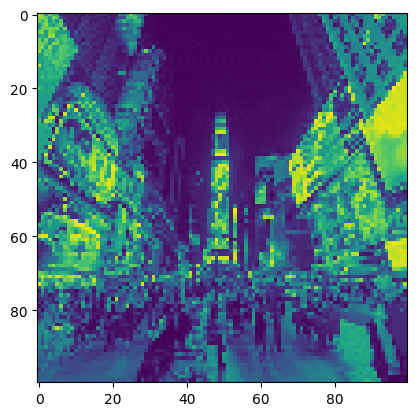

In [24]:
plt.imshow(random_tensor.view(100, 100).data)

## ANN

In [25]:
import torch
import numpy as np
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt

In [26]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [27]:
def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

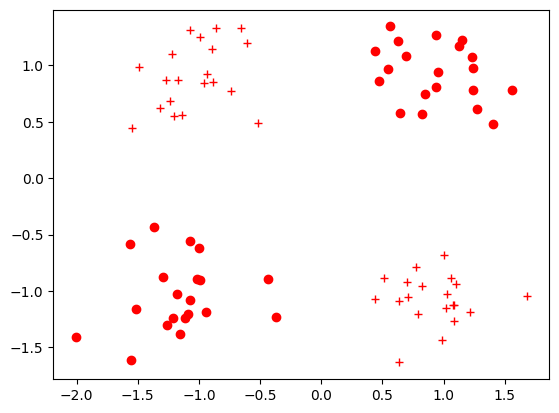

In [28]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [29]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [30]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [31]:
## 모델 생성 및 관련 변수와 알고리즘 정의
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [32]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.6880258321762085


오차값이 0.66 이 나왔습니다. 이정도의 오차를 가진 모델은 사실상 분류하는 능력이 없다고 봐도 무방합니다.
자, 이제 드디어 인공신경망을 학습시켜 퍼포먼스를 향상시켜 보겠습니다.

In [33]:
## 신경망 학습
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.6799489259719849
Train loss at 100 is 0.6138755083084106
Train loss at 200 is 0.5329579710960388
Train loss at 300 is 0.4305679202079773
Train loss at 400 is 0.318173348903656
Train loss at 500 is 0.22215072810649872
Train loss at 600 is 0.15626798570156097
Train loss at 700 is 0.11458499729633331
Train loss at 800 is 0.0878569558262825
Train loss at 900 is 0.07001081109046936
Train loss at 1000 is 0.05757322907447815
Train loss at 1100 is 0.0485338494181633
Train loss at 1200 is 0.04171337932348251
Train loss at 1300 is 0.03641809895634651
Train loss at 1400 is 0.03220761567354202
Train loss at 1500 is 0.028791893273591995
Train loss at 1600 is 0.025980111211538315
Train loss at 1700 is 0.023627975955605507
Train loss at 1800 is 0.021638046950101852
Train loss at 1900 is 0.019931523129343987


In [34]:
## 학습 후 모델 성능 평가
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.030465688556432724


학습을 하기 전과 비교했을때 현저하게 줄어든 오차값을 확인 하실 수 있습니다.
지금까지 인공신경망을 구현하고 학습시켜 보았습니다.
이제 학습된 모델을 .pt 파일로 저장해 보겠습니다.

In [35]:
## 학습된 가중치 저장
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-1.2966, -1.3400],
        [ 1.5969, -1.3572],
        [-0.1320, -0.5916],
        [ 1.6716,  1.5630],
        [-1.3113,  1.6235]])), ('linear_1.bias', tensor([0.0449, 0.0826, 0.0168, 0.1027, 0.0205])), ('linear_2.weight', tensor([[-1.7967,  1.9571, -0.2307, -2.1367,  1.9643]])), ('linear_2.bias', tensor([-0.0913]))])


`save()` 를 실행하고 나면 학습된 신경망의 가중치를 내포하는 model.pt 라는 파일이 생성됩니다. 아래 코드처럼 새로운 신경망 객체에 model.pt 속의 가중치값을 입력시키는 것 또한 가능합니다.

In [36]:
## 저장된 가중치를 불러와 새로운 모델에 적용 (전이 학습)
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9967021346092224
